/home/robby/miniconda3/envs/myocr/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
INFO:root:Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0
INFO:root:Onnx model /home/robby/.MyOCR/models/crnn_lite_lstm.onnx loaded to cuda:0


predict cost: 0.5302681922912598 
result:[(text=家，，家, confidence=0.8131991624832153, bounding_box=(left=26, bottom=92, right=197, top=41))
, (text=, confidence=0.7269073128700256, bounding_box=(left=248, bottom=87, right=396, top=49))
, (text=, confidence=0.7736480236053467, bounding_box=(left=567, bottom=88, right=635, top=54))
, (text=, confidence=0.780951201915741, bounding_box=(left=734, bottom=88, right=803, top=54))
, (text=金腿, confidence=0.7862396836280823, bounding_box=(left=1070, bottom=88, right=1140, top=54))
, (text=体，, confidence=0.7772061824798584, bounding_box=(left=903, bottom=88, right=971, top=55))
, (text=人民,号平台, confidence=0.913412868976593, bounding_box=(left=2188, bottom=85, right=2324, top=58))
, (text=东佛山发展新型农村集体经济,为乡材“二次造加, confidence=0.9779011011123657, bounding_box=(left=434, bottom=249, right=1151, top=223))
, (text=27N-/公9人元中, confidence=0.9608469605445862, bounding_box=(left=453, bottom=359, right=1449, top=318))
, (text=人民我南方三报记记者利景锋赵越陈捷生2025-03-2700:00, 

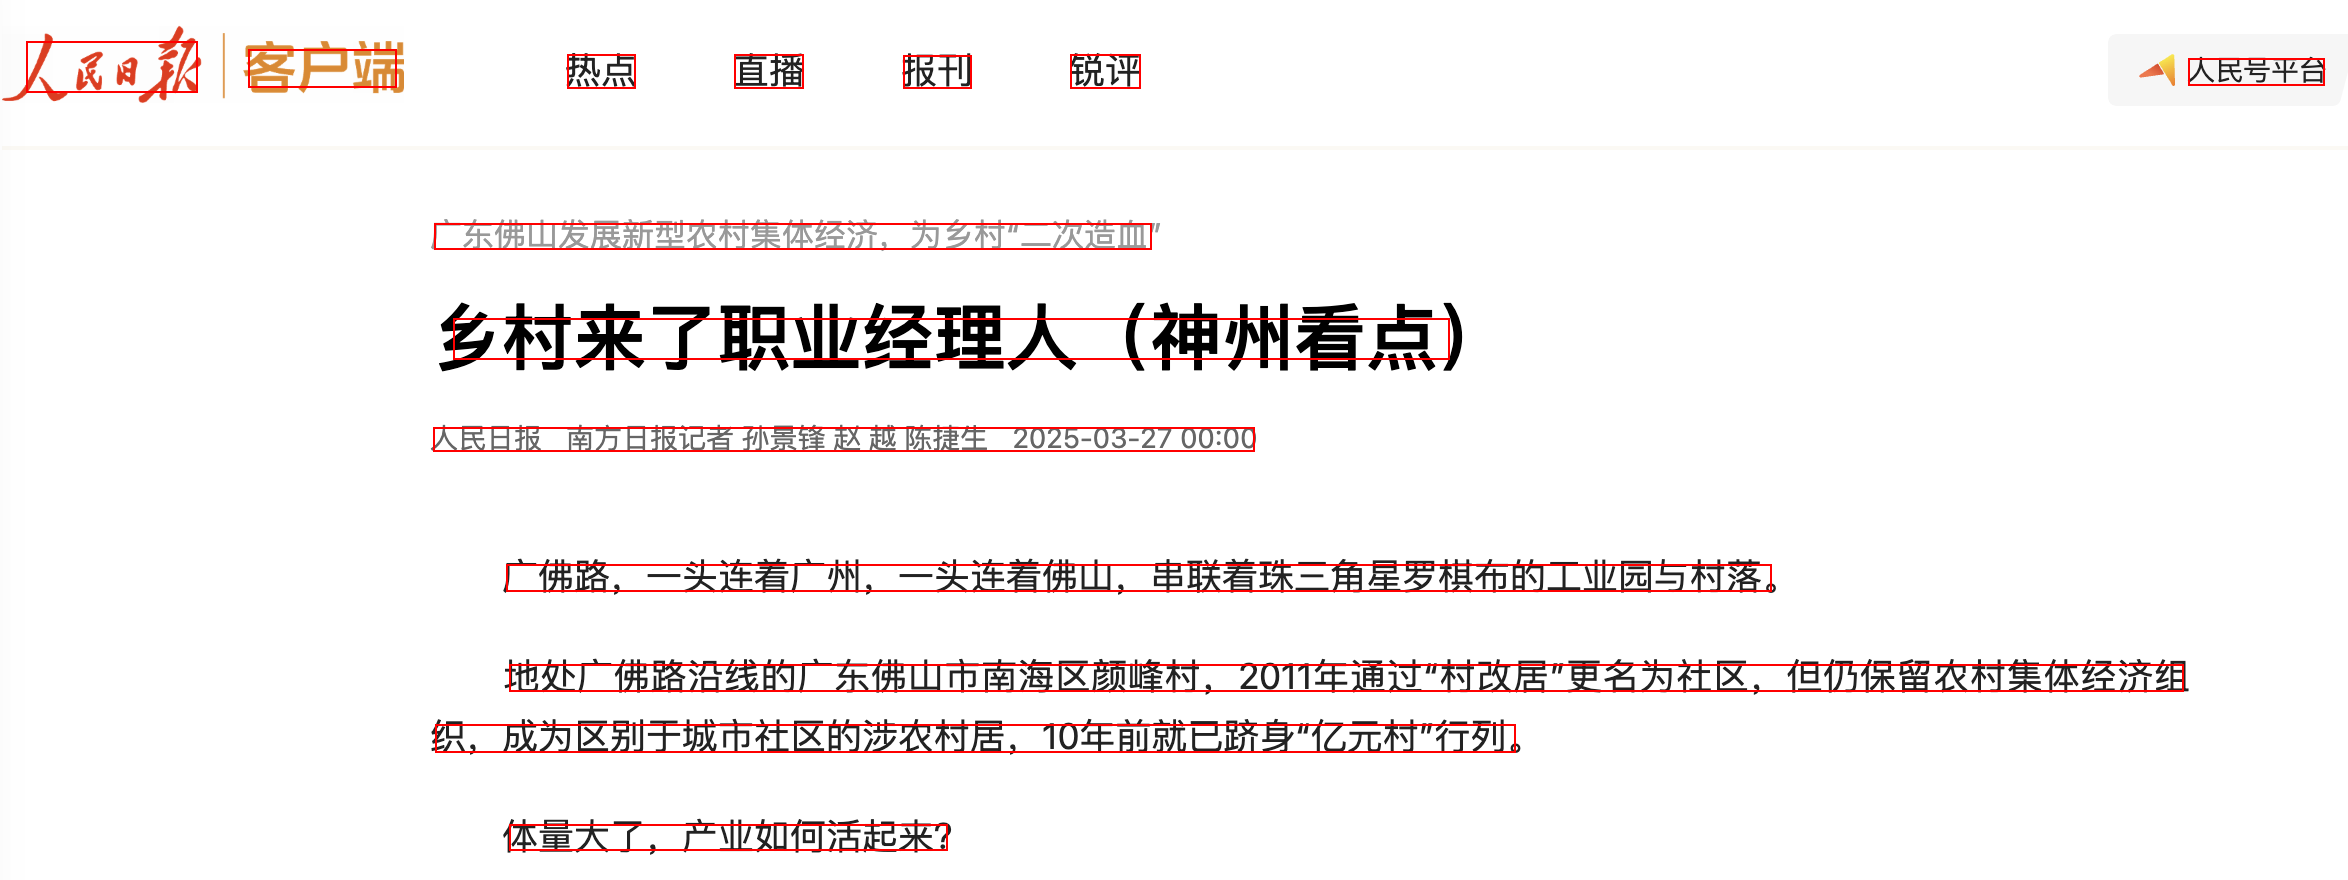

In [1]:
import time
import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.models.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter
from myocr.predictors.text_recognition_predictor import TextRecognitionParamConverter

orig_image = Image.open("images/test.png").convert("RGB")

dec = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
model = ModelZoo.load_model("onnx", MODEL_PATH+"crnn_lite_lstm.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")

start_time = time.time()
dec_predictor = dec.predictor(TextDetectionParamConverter(dec.device))
detected = dec_predictor.predict(orig_image)

cvt = TextRecognitionParamConverter()
p = model.predictor(cvt)
rec = p.predict(detected)
ent_time = time.time()
print(f"predict cost: {ent_time-start_time} \nresult:{rec}")

draw = ImageDraw.Draw(orig_image)
for box in detected.bounding_boxes: # type: ignore
    draw.polygon(
        [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
        outline="red",
        width=2,
    )

display(orig_image)
if cvt.retain_croped_imgs:
    for img in cvt.croped_imgs:
        display(img)
